In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv('C://Users//HP//Downloads//boston_data//Boston.csv', index_col=0)

In [71]:
from sklearn.neighbors import KNeighborsRegressor
knn  =  KNeighborsRegressor(n_neighbors=5)

In [72]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [73]:
feature_col = ['crim', 'rm', 'tax']
X = df[feature_col]

In [74]:
X.head()

,crim,rm,tax
1,0.00632,6.575,296
2,0.02731,6.421,242
3,0.02729,7.185,242
4,0.03237,6.998,222
5,0.06905,7.147,222


In [75]:
y = df.medv
y.head()

1    24.0
2    21.6
3    34.7
4    33.4
5    36.2
Name: medv, dtype: float64

In [76]:
knn.fit(X,y)

KNeighborsRegressor()

In [77]:
print(knn.predict(X))

[26.3  24.38 24.38 32.46 33.46 30.98 21.9  20.56 19.78 21.9  20.56 21.9
 19.78 19.36 19.2  18.14 16.94 18.26 16.68 16.84 13.42 18.12 16.16 16.6
 17.94 16.68 18.14 17.9  25.22 24.42 15.4  15.9  15.9  15.4  15.9  21.82
 21.82 21.82 21.82 32.06 32.8  22.88 21.56 21.56 21.56 17.94 19.3  21.56
 17.94 17.94 22.04 22.04 22.04 22.04 16.84 35.36 22.32 35.82 19.96 19.96
 19.96 19.96 21.22 23.84 38.98 22.6  22.12 25.34 25.34 25.34 22.74 22.3
 22.3  22.74 21.5  21.5  21.5  21.5  21.5  21.28 24.82 24.82 24.82 24.82
 24.62 24.62 24.62 24.62 23.96 23.96 22.62 22.62 22.62 22.62 22.62 24.6
 23.52 34.56 34.56 34.56 22.36 22.36 19.92 20.18 20.18 19.76 19.76 20.18
 21.4  20.18 20.18 20.08 19.2  19.18 19.18 19.08 19.18 19.08 19.2  19.2
 19.78 20.6  20.6  20.   19.78 19.66 19.04 15.86 17.28 16.46 19.08 18.82
 19.04 15.86 17.14 19.04 15.86 19.08 15.86 18.06 16.86 16.02 14.36 17.
 14.54 20.34 20.12 14.58 14.58 19.06 22.72 20.08 20.08 20.12 21.44 17.
 15.3  31.72 21.44 22.62 21.8  48.26 48.26 48.26 18.12 18.42

In [78]:
knn.score(X,y)

0.7430371362180326

In [99]:
#Lets seach for the optimal value for k
from sklearn.model_selection import cross_val_score
from sklearn import metrics
k_range = range(1,31)
k_score=[]
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X,y, cv=10, scoring='neg_mean_squared_error')
    k_score.append(scores.mean())
print((k_score))

[-90.62786588235294, -77.56825735294119, -72.0206311111111, -73.78797995098037, -76.17554771764705, -77.12129993464052, -77.6024732372949, -79.07771129901961, -80.99596266279352, -82.7587742235294, -81.45516427807486, -82.43518998638343, -83.15495003132614, -84.00177419767905, -85.05588203224401, -85.82693711397057, -85.87465989415836, -86.72110790486565, -87.84125263918308, -88.97916527843135, -89.85598700280113, -90.69426488575596, -90.11680032766225, -89.10140855392157, -88.19143835482353, -87.08944237324515, -86.09374192420452, -84.74715148059224, -83.52781704366882, -82.94644507102394]


Text(0, 0.5, 'cross val accuracy')

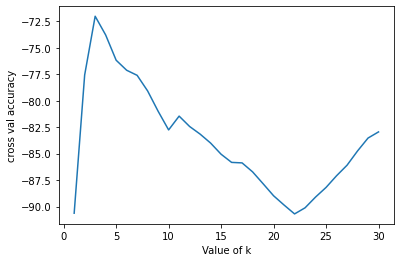

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
# ploting the value of k for knn (x-axis) vs the cross val.(y-axis)
plt.plot(k_range, k_score)
plt.xlabel('Value of k')
plt.ylabel('cross val accuracy')

In [94]:
knn1  =  KNeighborsRegressor(n_neighbors=2)
knn1.fit(X,y)

KNeighborsRegressor(n_neighbors=2)

In [95]:
print(knn1.predict(X))

[26.7  28.15 28.15 30.8  36.15 28.55 20.9  23.   19.1  18.9  21.05 20.9
 20.3  22.35 19.3  18.25 18.8  18.55 17.05 17.4  13.35 18.55 14.85 18.8
 16.55 17.05 18.25 17.2  24.25 19.7  12.9  13.85 13.85 12.9  14.   19.95
 20.5  20.5  21.8  32.85 32.85 25.65 25.   25.   23.25 19.35 19.65 18.9
 16.9  19.35 21.55 21.95 22.75 21.55 16.1  41.95 19.85 40.8  19.65 17.8
 19.15 17.8  23.6  23.6  34.2  21.45 21.45 21.45 19.15 21.45 23.8  22.25
 22.25 23.8  22.75 20.7  20.7  21.   22.65 20.55 25.95 25.95 23.85 23.85
 25.25 25.25 22.35 22.35 26.15 26.15 22.3  22.3  22.75 22.8  22.8  28.55
 22.2  41.25 41.25 38.5  27.   27.   19.2  19.7  20.25 19.5  19.5  20.25
 19.2  19.35 20.9  20.65 19.6  18.95 19.85 18.55 19.85 18.75 19.6  19.85
 20.4  20.4  20.4  18.05 20.4  20.95 16.5  17.3  18.6  14.95 18.15 21.3
 20.55 15.85 14.95 20.55 15.35 18.15 15.85 17.95 15.7  14.35 14.4  14.5
 13.2  18.8  17.5  16.2  15.45 14.25 19.25 17.45 17.45 17.5  20.65 20.3
 15.45 32.3  20.65 25.15 22.   50.   50.   50.   20.9  20.

In [96]:
knn1.score(X,y)

0.856872653852603